## SOcial ANalysis (SOAN)

**Goal**  
On 17 August 2018,I married the woman of my dreams. In order to know just how special she was (and is) to me I decided to put my data science skills to work. I analysed whatsapp data and all of our pictures that we made together. The end product was a small book that included results of this notebook with descriptions of all analyses that were done. I gave it to her the day before we married as to show what she means to me. 

**Project**  
The project started off with basic data analyses, namely getting means and sums of different statistics such as average number of words per message per user and eventually evolved into analyzing topics that were frequently discussed in the group chat. Personally, the most interesting analysis I have done in this project was using TF-IDF as a way to extract words that characterize each person in the group chat. It is interesting to see which words are often used by one person, but rarely by all others. 

Use the table of contents below to go to the analysis of your interest. 

## <a name="table">Table of Contents</a> 

1. [Functions](#functions)

2. [General Statistics](#general)  

    2.1 [Prepare Data](#gs-data)  
        
    2.2 [Users in the Group](#users)
    
    2.3 [Messages over time](#gs-messages)  
    
    2.4 [Active Moments](#gs-active) 
    
    2.5 [Averages / Summaries](#gs-averages) 
    
    2.6 [Response Time](#gs-response) 
    
3. [TF-IDF](#tfidf)  

    3.1 [Count Vector](#tf-count)  

    3.2 [Unique Words](#tf-unique)  

    3.3 [Plot Image](#tf-image)  

4. [Emoji Analysis](#emoji)  

    4.1 [Prepare Data](#emoji-prepare)  

    4.2 [Unique and Common Emojis](#emoji-stats)  

    4.3 [Correlation Matrix](#emoji-corr)  
    
5. [Topic Modelling](#topic)  

    5.1 [Prepare Data](#topic-prepare)  

    5.2 [LDA](#topic-lda)  

    5.3 [NMF](#topic-nmf)  
    
6. [Sentiment Analysis](#sentiment)  

    6.1 [Prepare Data](#sentiment-prepare)  

    6.2 [Average Sentiment](#sentiment-average)  
    
    6.3 [Plot Sentiment](#sentiment-plot)  
    
7. [Word Clouds](#cloud)  

    7.1 [Prepare Data](#cloud-prepare)  

    7.2 [Masked Word Cloud](#cloud-mask)  

    7.3 [Sentiment-based Word Cloud](#cloud-sentiment) 
    
8. [Color Analysis](#color)  

    8.1 [Extract Frequent Colors (k-Means)](#color-get)  

    8.2 [Plot Frequent Colors](#color-plot)  

## <a name="functions">1. Functions</a> 
[Back to Table of Contents](#table)

I purposefully imported all packages manually just to show you which are which and how they work. 

In [1]:
!cd D:\workspace\Jupyter\exp_45.2_whatsapp\soan_master\whatsapp
!del /s /q *.pyc

Could Not Find D:\workspace\Jupyter\exp_45.2_whatsapp\*.pyc


In [2]:
# Runs in kernel: py_2716
from soan_master.whatsapp import helper      # Helper to prepare the data
from soan_master.whatsapp import general     # General statistics

from soan_master.whatsapp import tf_idf      # To calculate TF-IDF 
# Dependency: pip install pillow (for PIL: Python Image Library)

In [3]:
from soan_master.whatsapp import soan_emoji # To analyze emoji use # Dependency: pip install emoji regex seaborn

# Error you get while trying to import the emoji.py as is. 
# ImportError: cannot import name emoji
# Solution: You need to rename it to something else like "soan_emoji.py"

In [4]:
from soan_master.whatsapp import topic       # Topic modelling and summarization # Dependency: pip install sklearn
# Dependency: "pip install pattern"
# "pattern3" is not same as "pattern" and "pattern" does not come for Python-3 (as of 20190717).

from soan_master.whatsapp import sentiment   # Sentiment Analysis
from soan_master.whatsapp import soan_wordcloud   # Create Word Clouds # Dependency: pip install wordcloud palettable

from soan_master.colors   import colors      # Frequent Color Visualization

%matplotlib inline

## <a name="general">2. General Statistics</a> 
[Back to Table of Contents](#table)

Here you can find general data with regards to whatsapp conversations such as the number of messages and words. Keep in mind this is simply to get a general understanding of the conversations. More complex and interesting information can be found in the later chapters. 

#### <a name="gs-data">2.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data is preprocessed by loading in the raw txt file which is sent through whatsapp to your mail. The following columns are created:
* Message_Raw
    * The raw message for each user (including date and name of user)
* User
    * The user who has sent the message, if no users have sent that message
    then it is simply removed from the dataframe
* Message_Clean
    * Only containing the message, but with all possible symbols in there
    Thus, no date and no name of the user
* Message_Only_Text
    * Only text, lowercase
* Date
    * Date in the format y/m/d

In [6]:
#df = helper.import_data('WhatsApp Chat with FSADM Team.txt')
#df = helper.import_data('WhatsApp Chat with Cousins (201910-201912).txt')
#df = helper.import_data('files_1/WhatsApp Chat with BITS Lounge (20200117).txt')
df = helper.import_data('files_1/WhatsApp Chat with BITS Lounge.txt')

In [7]:
df = helper.preprocess_data(df)

In [8]:
df['User'] = df.apply(lambda row: ''.join([i if ord(i) < 128 else '' for i in row.User]), axis = 1)
# Removing emoticons from name
# This LOC is not working from Python file and is hence commented there.
# File 'D:\workspace\Jupyter\exp_45.2_whatsapp\soan_master\whatsapp\helper.py'

In [9]:
# Change labels for anonymization 
#user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['Her', 'Me'])}
#df.User = df.User.map(user_labels)

#### <a name="users">2.2 Users in the group</a> 
[Back to Table of Contents](#table)

In [10]:
#general.print_users(df)

#### <a name="gs-messages">2.3 Messages over time</a> 
[Back to Table of Contents](#table)

C:\Users\ashish.jain50\AppData\Local\Continuum\anaconda3\envs\py_2716\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


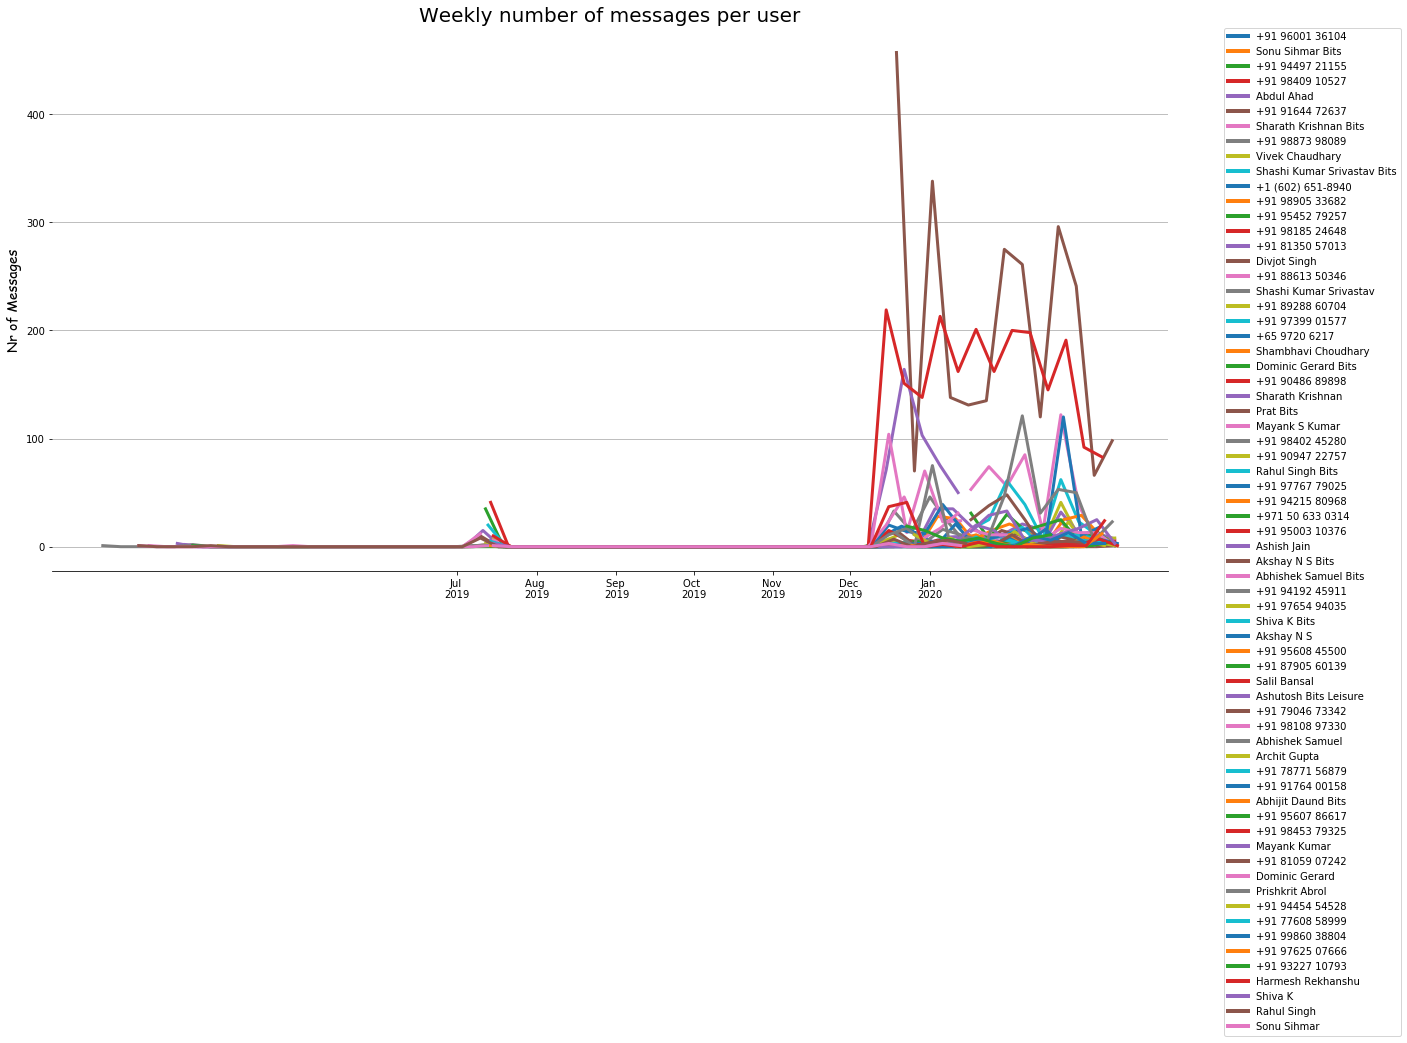

In [11]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

#### <a name="gs-active">2.4 Active Moments</a> 
[Back to Table of Contents](#table)

**Daily Activity**  
This shows the daily activity per person in a spider plot and in total in a histogram. 
NOTE: This is unstandardized data, which means that it also shows the amount of messages. 

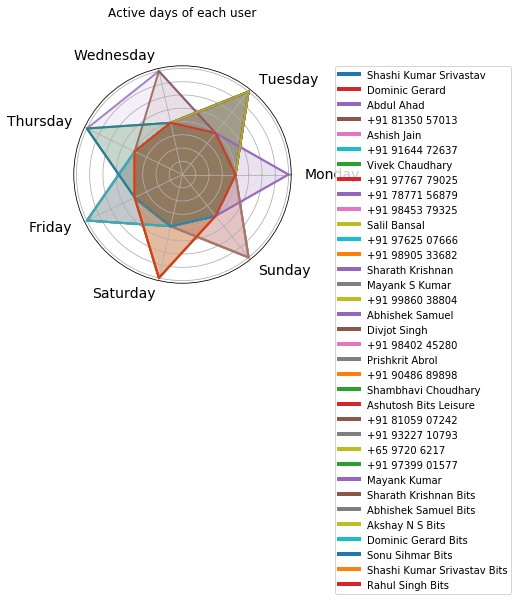

In [12]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

# The spider plot is not giving the expected results.

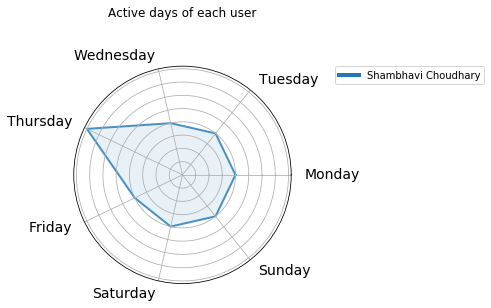

In [19]:
general.plot_day_spider(df[df['User'] == 'Shambhavi Choudhary'], colors=None, savefig=False, dpi=100)

In [13]:
Day_of_Week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in set(df.User.tolist()):
    temp = df[df.User == i].groupby('Day_of_Week').count()['index'].to_frame().reset_index()
    temp.columns = ['Day_of_Week', 'msgs_sent']
    print(i + ": " + Day_of_Week[temp[temp.msgs_sent == temp.msgs_sent.max()].iloc[0]['Day_of_Week']]
          + ": " + str(temp[temp.msgs_sent == temp.msgs_sent.max()].iloc[0]['msgs_sent']))
    

+91 96001 36104: Sunday: 8
Sonu Sihmar Bits: Thursday: 11
+91 94497 21155: Tuesday: 6
+91 98409 10527: Saturday: 8
Abdul Ahad: Tuesday: 35
+91 91644 72637: Tuesday: 17
Sharath Krishnan Bits: Tuesday: 112
+91 98873 98089: Friday: 5
Vivek Chaudhary: Tuesday: 23
Shashi Kumar Srivastav Bits: Saturday: 49
+1 (602) 651-8940: Wednesday: 5
+91 98905 33682: Sunday: 18
+91 95452 79257: Sunday: 4
+91 98185 24648: Sunday: 5
+91 81350 57013: Sunday: 47
Divjot Singh: Tuesday: 650
+91 88613 50346: Saturday: 7
Shashi Kumar Srivastav: Tuesday: 37
+91 89288 60704: Thursday: 28
+91 97399 01577: Saturday: 23
+65 9720 6217: Friday: 7
Shambhavi Choudhary: Thursday: 39
Dominic Gerard Bits: Friday: 42
+91 90486 89898: Saturday: 14
Sharath Krishnan: Tuesday: 160
Prat Bits: Wednesday: 3
Mayank S Kumar: Friday: 78
+91 98402 45280: Friday: 7
+91 90947 22757: Sunday: 5
Rahul Singh Bits: Saturday: 22
+91 97767 79025: Tuesday: 93
+91 94215 80968: Sunday: 13
+971 50 633 0314: Monday: 3
+91 95003 10376: Sunday: 17
Ash

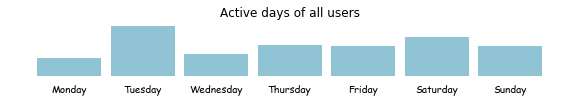

In [15]:
general.plot_active_days(df, savefig=False, dpi=100)

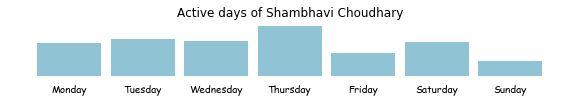

In [16]:
general.plot_active_days(df, savefig=False, dpi=100, user='Shambhavi Choudhary')

**Hourly Activity**  
It shows which days are most active based on the period in which most messages are send. 

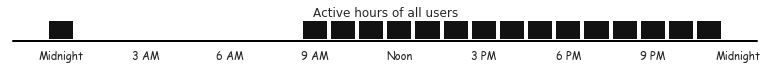

In [77]:
general.plot_active_hours(df, color='#121212', savefig=False, dpi=100, user='All')

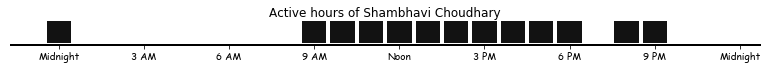

In [21]:
general.plot_active_hours(df, color='#121212', savefig=False, dpi=100, user='Shambhavi Choudhary')

**Calendar Map**  
Here you can choose for which year you want to see the activity

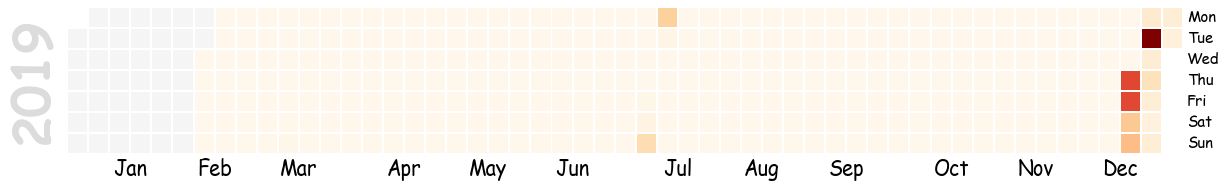

In [22]:
# Need to set the index and provide a single column
general.calendar_plot(df, year=2019, how='count', column='index')

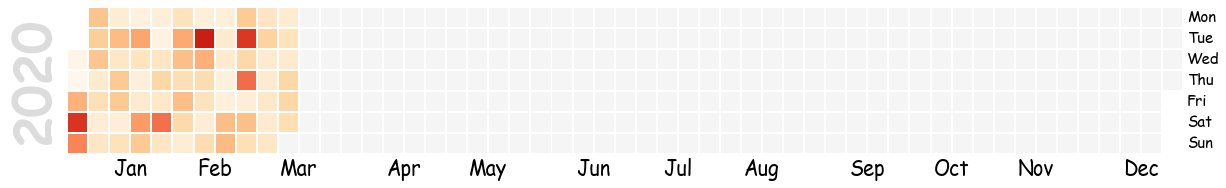

In [23]:
general.calendar_plot(df, year=2020, how='count', column='index')

#### <a name="gs-averages">2.5 Averages / Summaries</a> 
[Back to Table of Contents](#table)

Here you can find general averages and summaries. For those that are interested how often a person said "I love you", you can also find that. 

In [25]:
general.print_stats(df, love=True)
# NR / Nr / nr: implies "number"

##########################
##  Number of Messages  ##
##########################
()
123	Shashi Kumar Srivastav
30	Rahul Singh
13	+91 98108 97330
124	Dominic Gerard
161	Abdul Ahad
174	+91 81350 57013
59	Ashish Jain
11	+91 94192 45911
16	+91 95607 86617
87	+91 91644 72637
10	+91 90947 22757
44	+91 87905 60139
97	Vivek Chaudhary
260	+91 97767 79025
46	+91 78771 56879
50	+91 91764 00158
34	+91 98453 79325
12	+91 96001 36104
2196	Salil Bansal
31	+91 97625 07666
13	+91 94215 80968
47	+91 98905 33682
13	+91 95452 79257
17	+91 77608 58999
469	Sharath Krishnan
120	Harmesh Rekhanshu
26	+91 95003 10376
240	Mayank S Kumar
45	+91 99860 38804
39	+91 89288 60704
8	Sonu Sihmar
104	Akshay N S
8	Shiva K
36	Archit Gupta
61	Abhishek Samuel
2626	Divjot Singh
19	+91 98402 45280
432	Prishkrit Abrol
15	+91 79046 73342
21	+91 97654 94035
15	+91 94497 21155
43	+91 90486 89898
181	Shambhavi Choudhary
25	Ashutosh Bits Leisure
16	+91 98185 24648
29	+91 81059 07242
20	+91 98409 10527
77	+91 93227 10793
21	+65 9720 

#### <a name="gs-response">2.6 Response Time</a> 
[Back to Table of Contents](#table)

**keep_order = True** maintains the order of messages in the dataframe which is neccesary in order to calculate the response time between messages. However, it is more time-consuming which is why I created a separate function for this. 

In [26]:
# df.sort_values('Date', inplace=True)
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################
()
+91 98108 97330:              80.3
Abdul Ahad:                   34.77
Ashish Jain:                  29.43
+91 94192 45911:              20.36
+91 91644 72637:              53.55
Vivek Chaudhary:              25.72
+91 81350 57013:              20.71
+91 97767 79025:              27.87
+91 78771 56879:              10.86
+91 91764 00158:              33.33
+91 98453 79325:              44.44
+91 87905 60139:              21.81
+91 96001 36104:              12.63
Salil Bansal:                 9.3
Rahul Singh:                  59.65
Shashi Kumar Srivastav:       31.72
+91 97625 07666:              23.2
+91 90947 22757:              13.78
+91 94215 80968:              2.33
+91 98905 33682:              69.18
+91 95452 79257:              119.08
+91 77608 58999:              13.92
Sharath Krishnan:             5.98
Harmesh Rekhanshu:            6.88
+91 95003 10376:         

## <a name="tfidf">3. TF-IDF</a> 
[Back to Table of Contents](#table)

#### <a name="tf-count">3.1 Create Count Vector</a> 
[Back to Table of Contents](#table)

It creates the dataframe "counts" which is a dataframe that contains each word that is said in all conversations and counts how often each user has said that word. 

In [27]:
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, column="Word")

#### <a name="tf-unique">3.2 Unique Words</a> 
[Back to Table of Contents](#table)

Below you can see three version of TF-IDF that I created. After much experimentation it turns out that they are all quite similar and that Version C gives me a nice distribution of values needed for the plotting. Content-wise they all have a very similar meaning. 

**Version A - Messages**  
  
$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} m_i}{m_i} $  
  
$t_{ij} = $ Number of times word $j$ said by $i$   
$m_i = $ Number of messages texted by $i$  
  

**Version B - Words**

$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} w_i}{w_i}$

$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$w_i = $ Number of words texted by $i$


**Version C - Adjusted TF-IDF**

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$m = $ Number of all messages   

** Unique Words **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $


In [ ]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

#### <a name="tf-image">3.3 Plot Image</a> 
[Back to Table of Contents](#table)

This is where things got a bit tricky...

I created a horizontal bar chart with two bars stacked on top of each other both plotted on a background image. I started with a background image and plotted the actual values on the left and made it fully transparent with a white border to separate the bars. Then, on top of that I plotted which bars so that the right part of the image would get removed. 

In [37]:
tf_idf.print_users(df)

#############
##  Users  ##
#############
()
+91 96741 64936
Rahul Singh Mobile App Dev Bits
+91 98108 97330
+91 95000 64740
Abdul Ahad Bits Diss
+91 81350 57013
+91 94192 45911
+91 91644 72637
+91 90947 22757
+91 87905 60139
Vivek Chaudhary Bits Diss GrpC MAD
+91 97767 79025
+91 78771 56879
+91 91764 00158
+91 98453 79325
+91 96001 36104
Salil Bansal Diss Grp C Bits Infosys
+91 97625 07666
+91 94215 80968
+91 98905 33682
+91 94804 94131
Harmesh Kr Rekhanshu
+91 95003 10376
+91 99016 46061
+91 89288 60704
+91 99712 14555
+91 98458 64865
+91 99640 27359
+91 96004 25452
Divjot Singh Bits
+91 99996 93486
+91 79046 73342
+91 97654 94035
+91 90486 89898
+91 80957 64285
Ashutosh Bits Leisure
+91 98409 10527
+91 93227 10793
+91 94454 54528
+91 98873 98089


**Instructions**  
Make sure to change "user" in the function below to one of the users as seen above. It needs to be the exact same naming otherwise it will not work. Furthermore, a valid picture needs to be selected. You can choose the sizing yourself which might need some experimenting with before finding the right size. It also works with a link to the image online. 

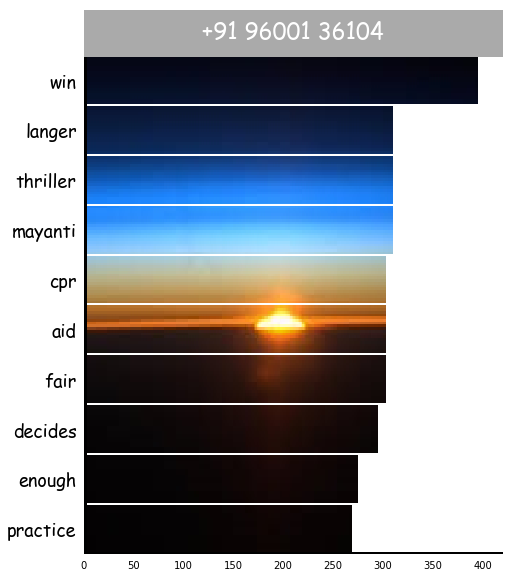

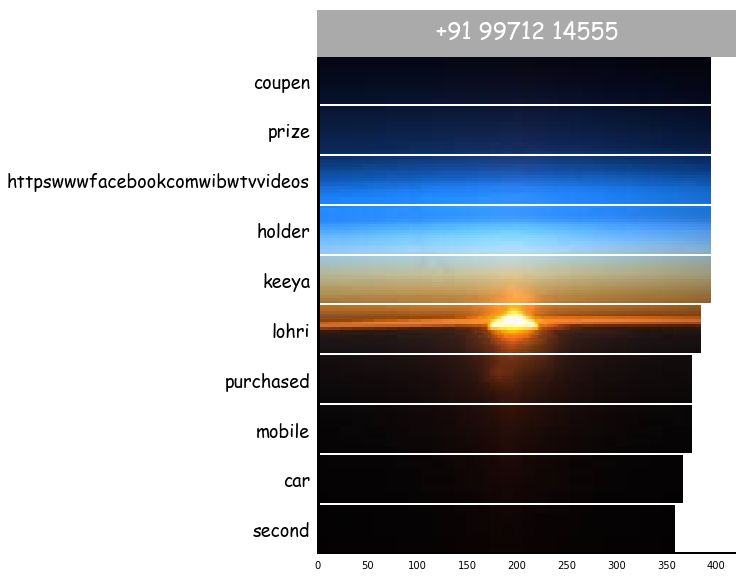

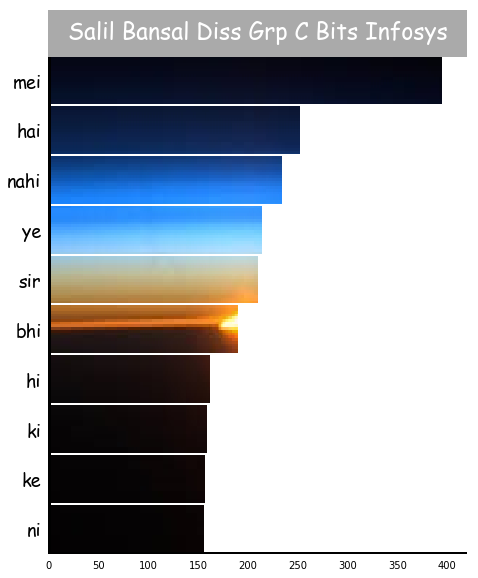

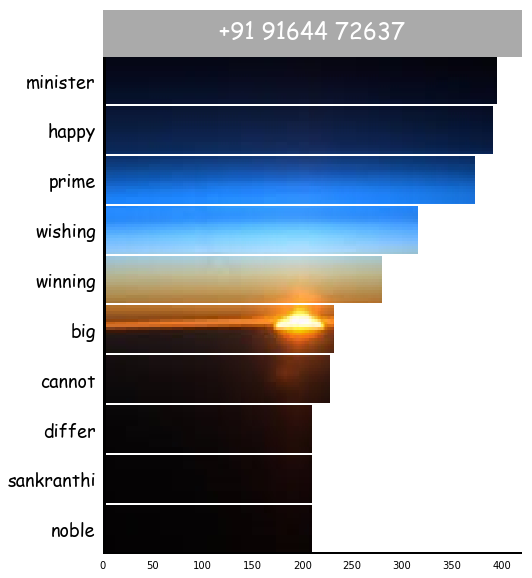

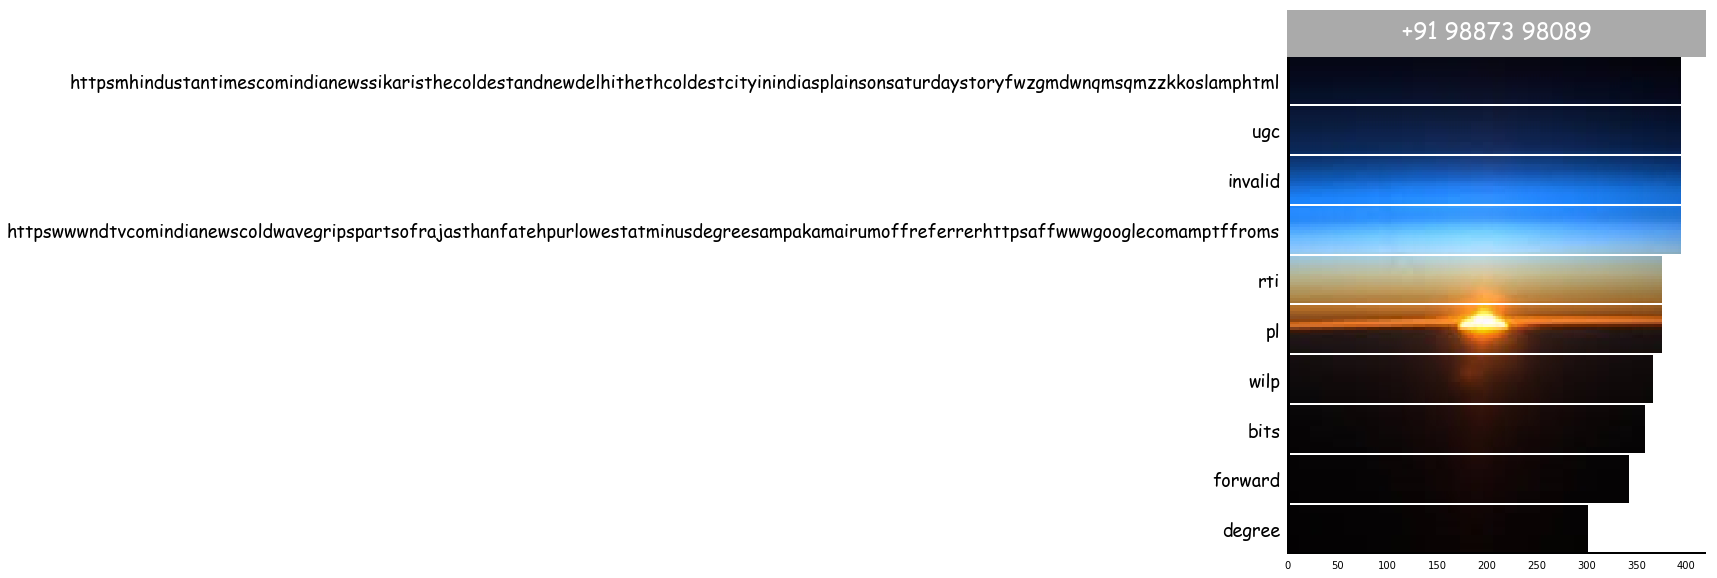

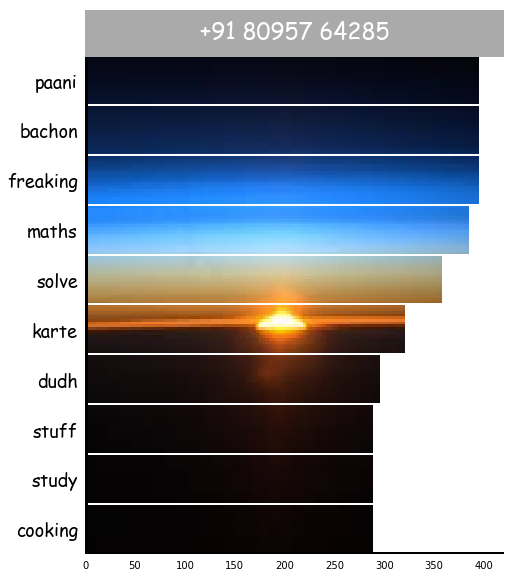

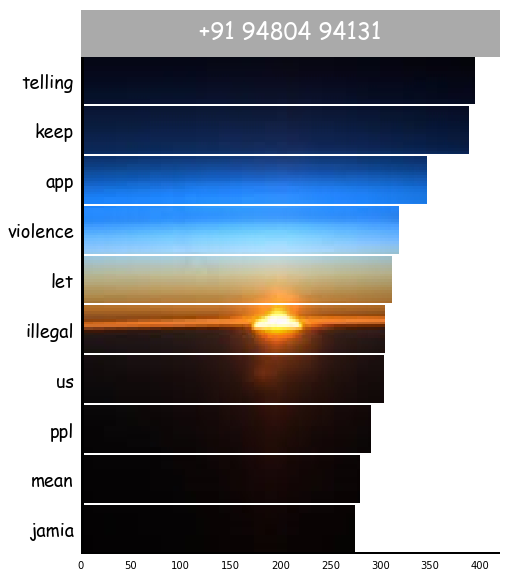

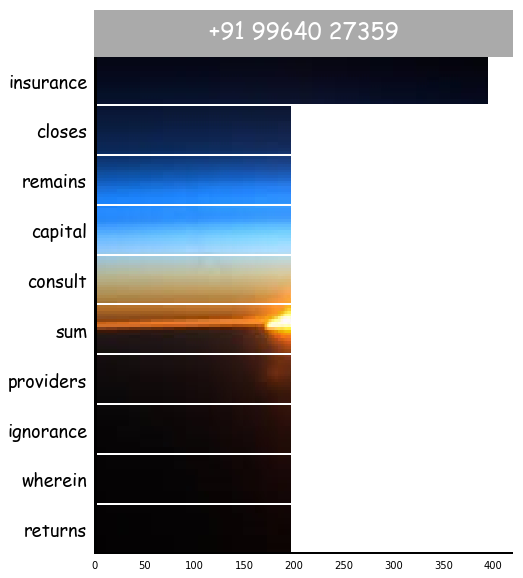

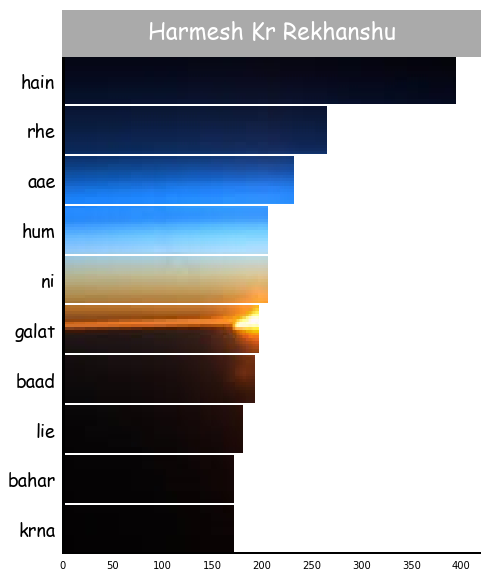

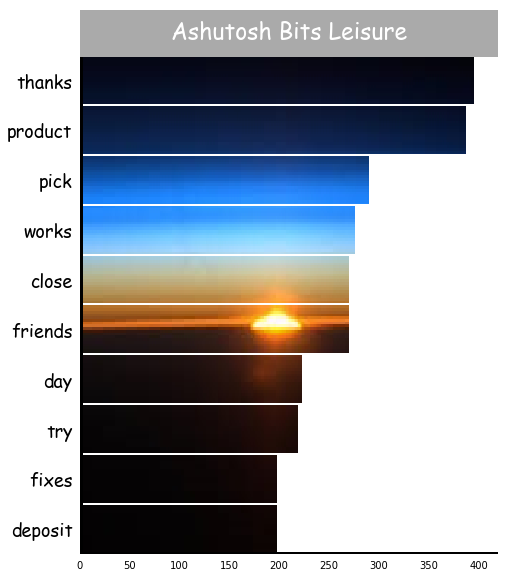

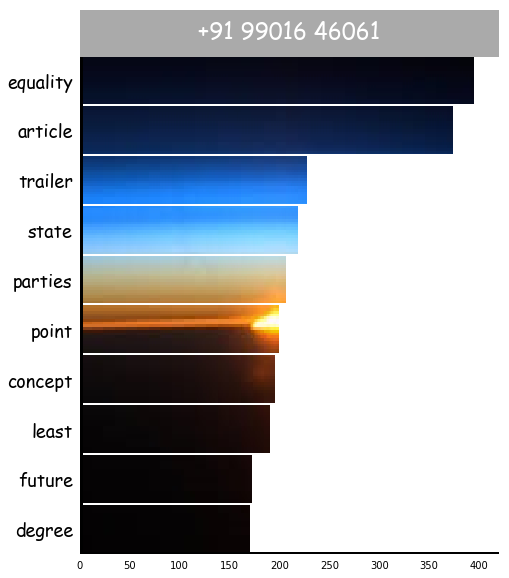

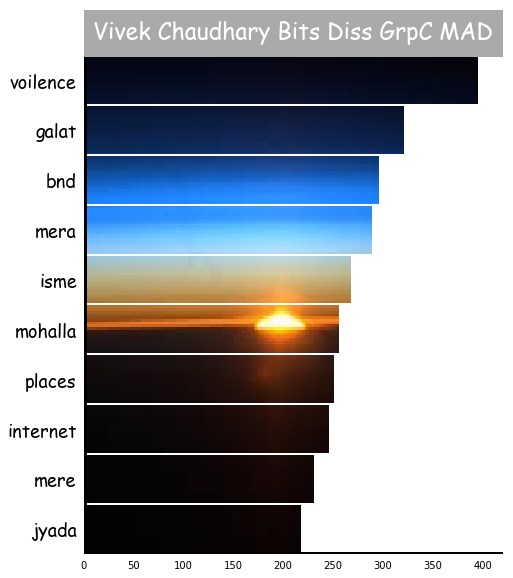

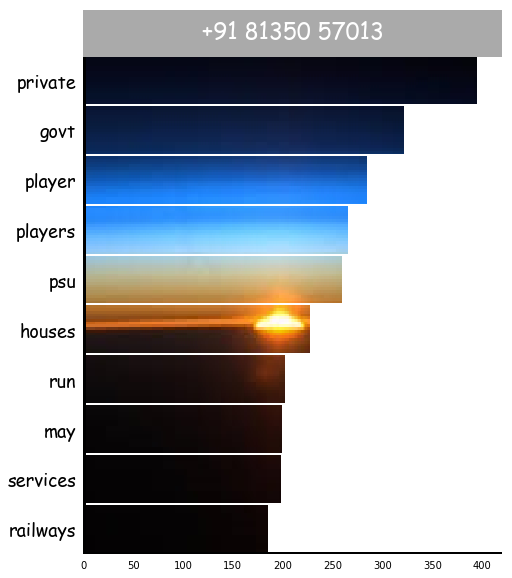

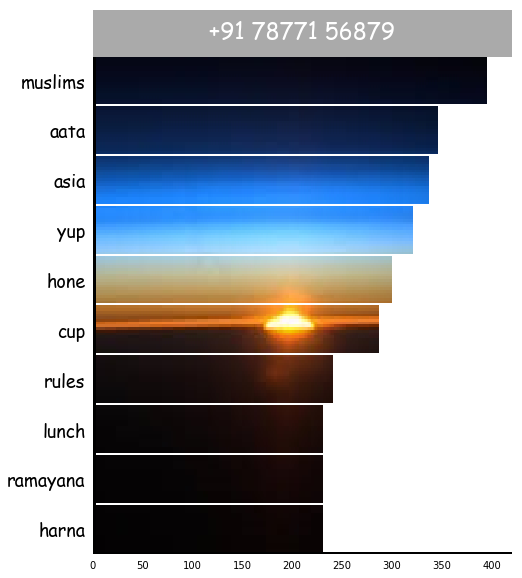

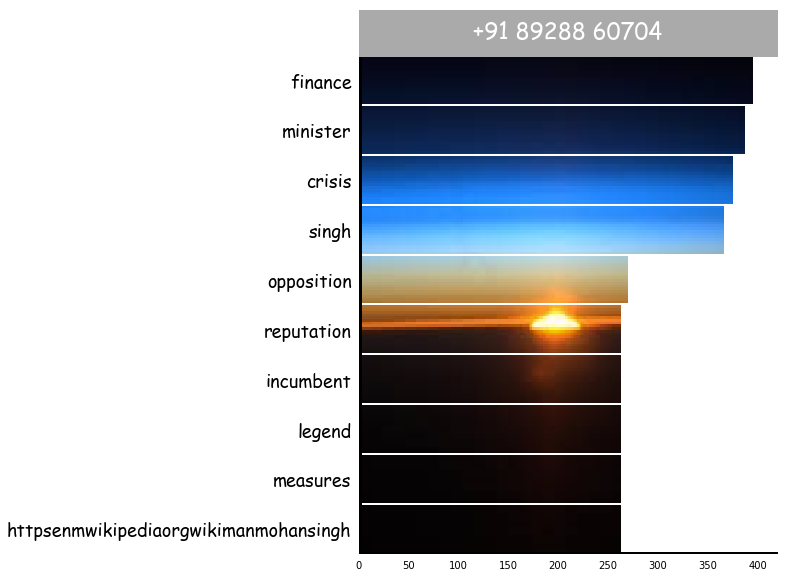

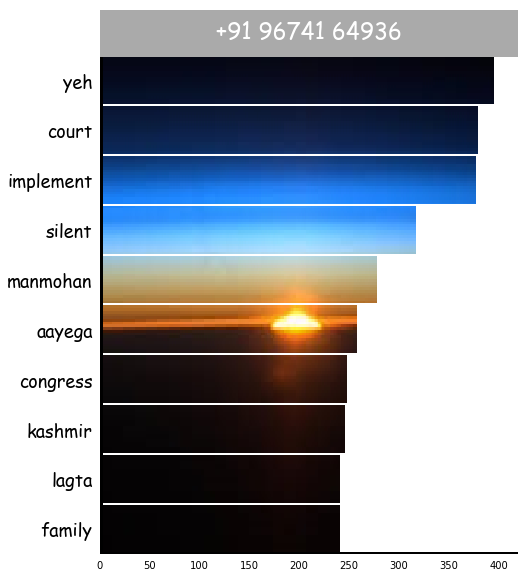

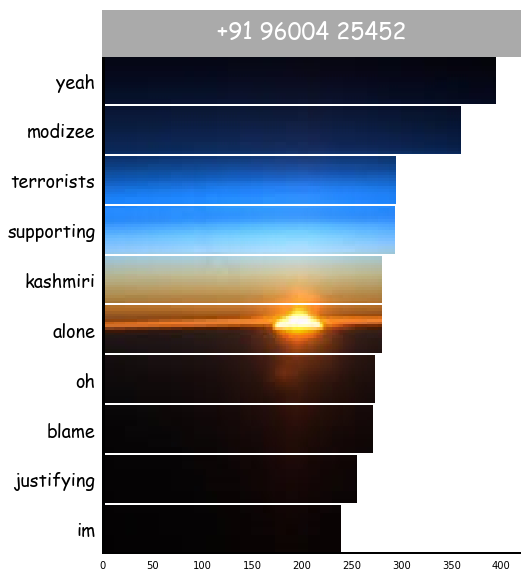

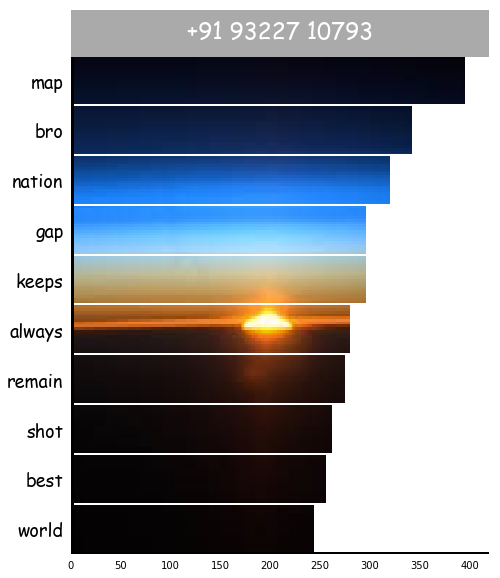

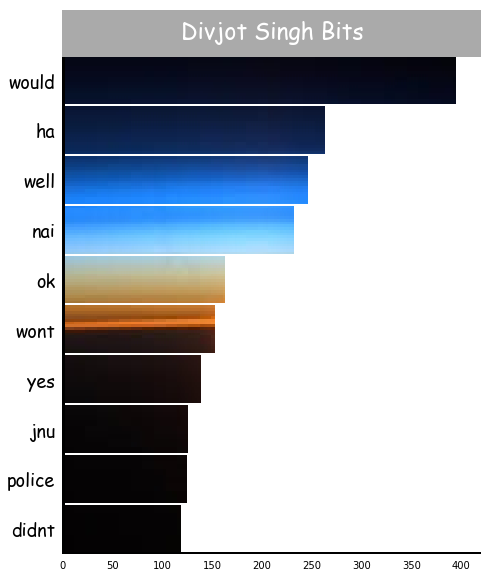

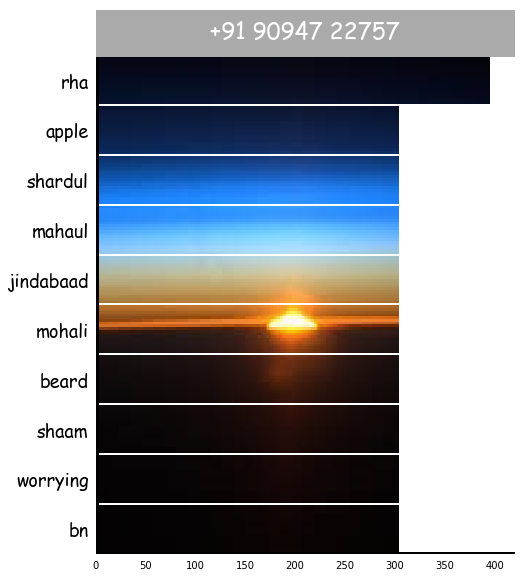

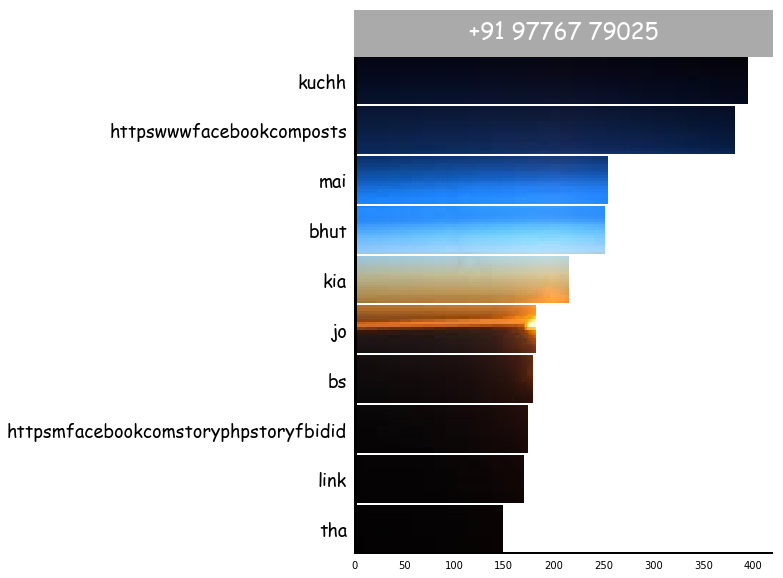

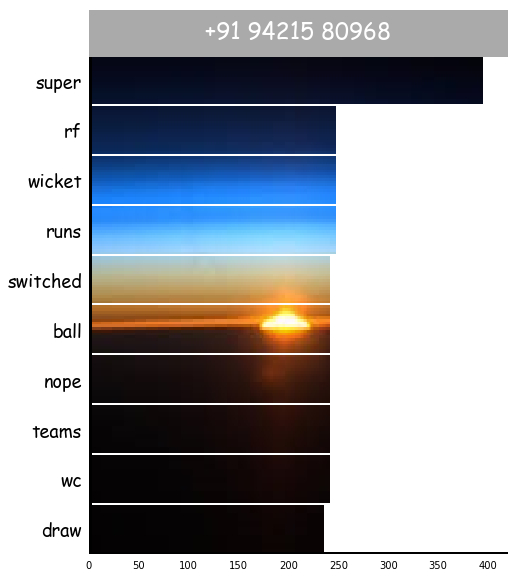

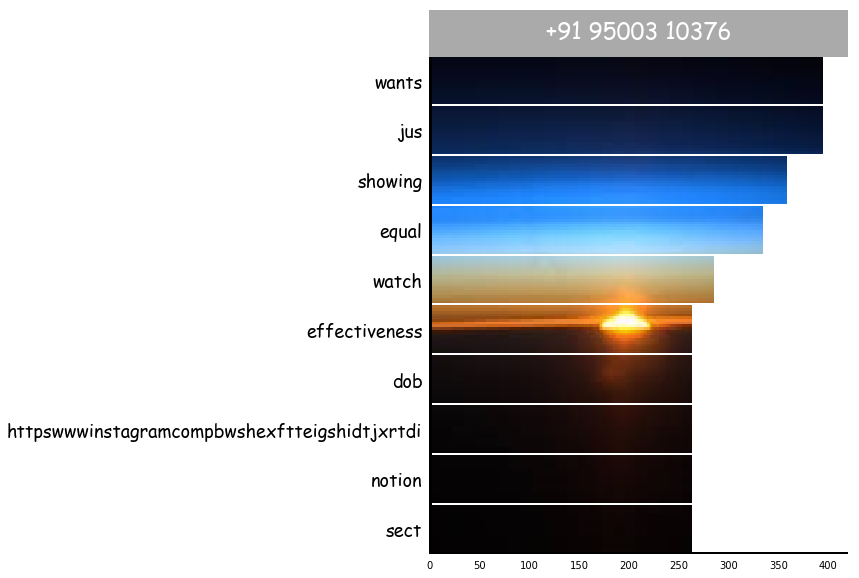

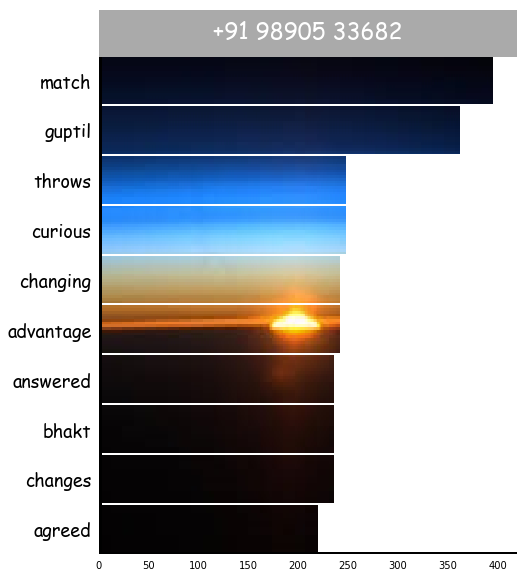

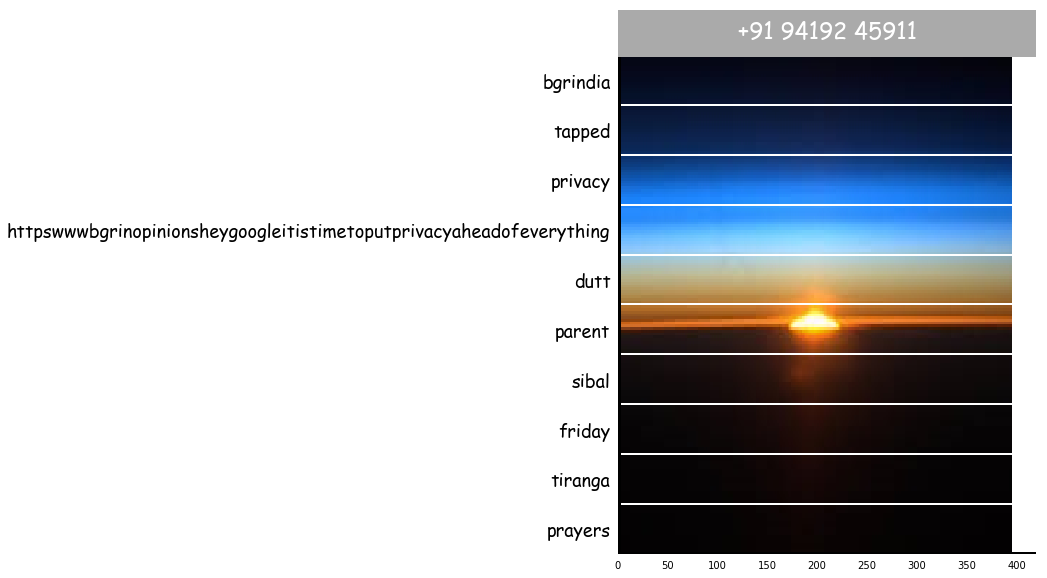

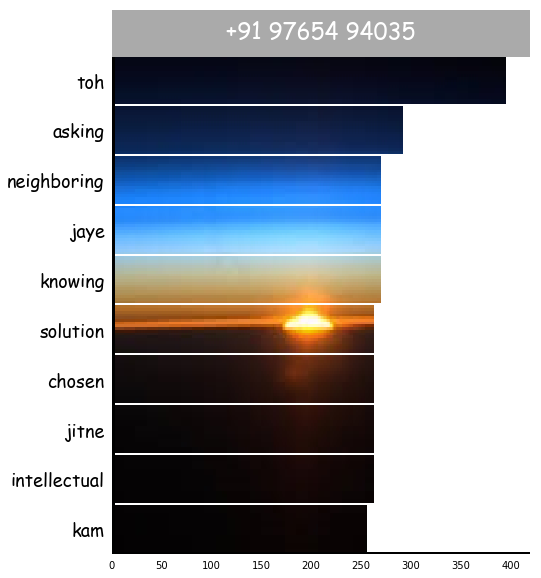

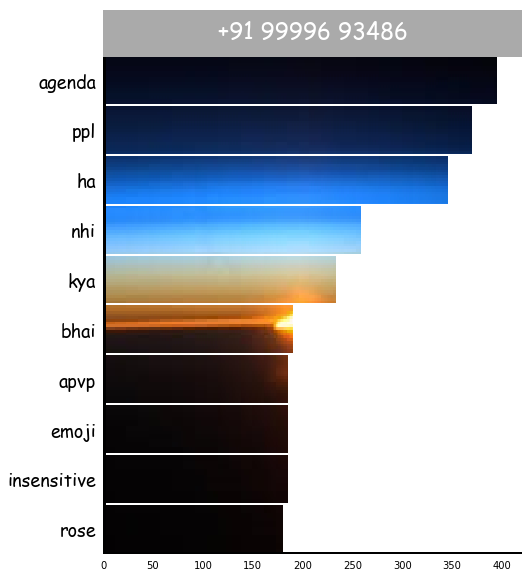

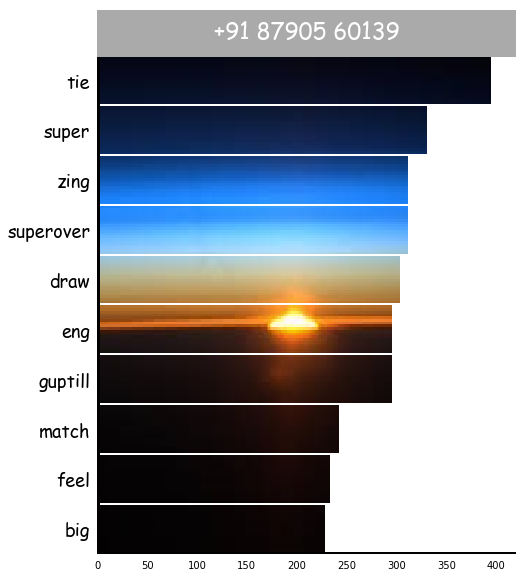

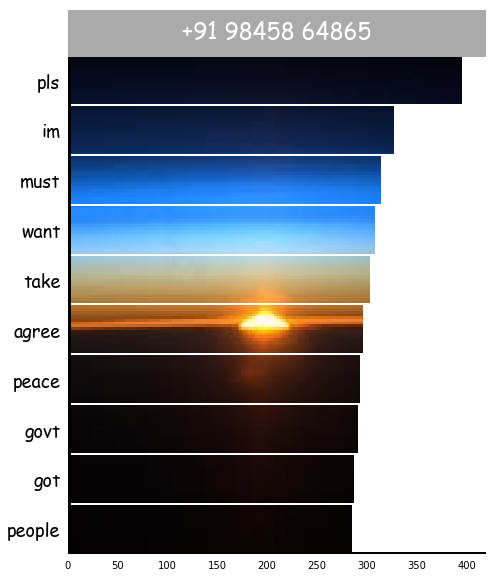

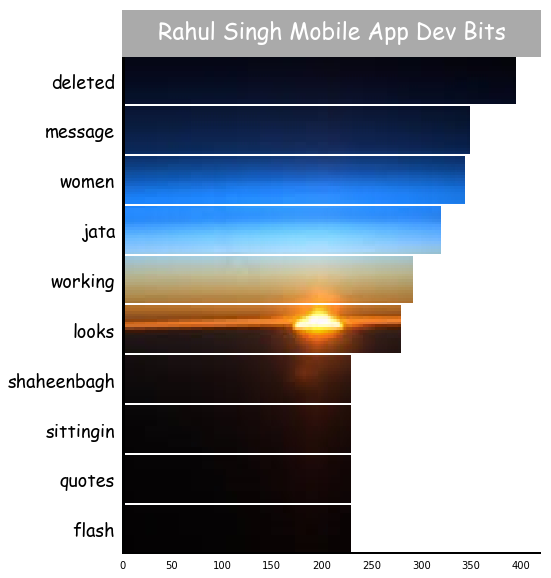

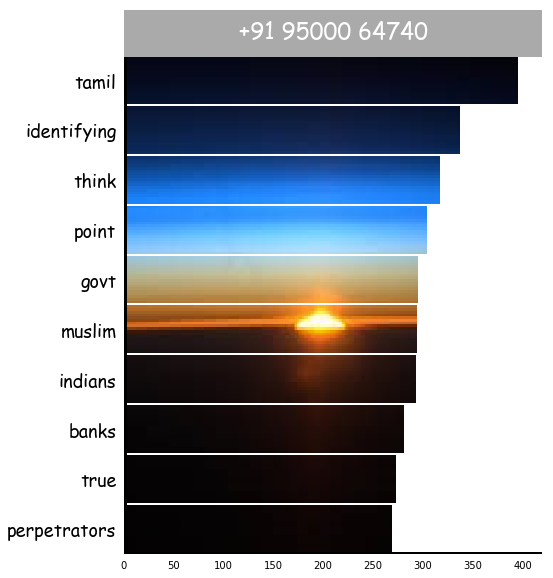

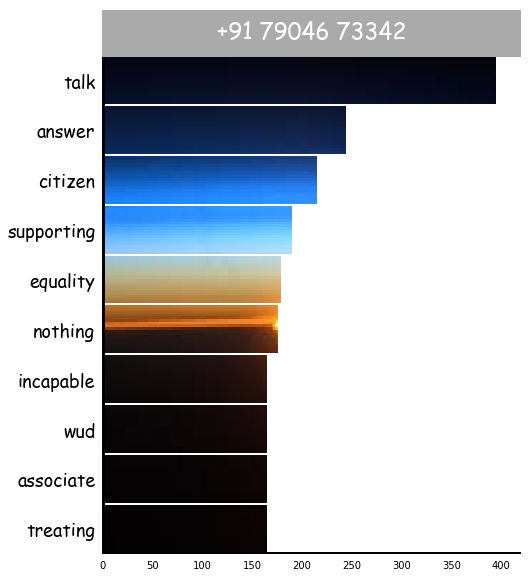

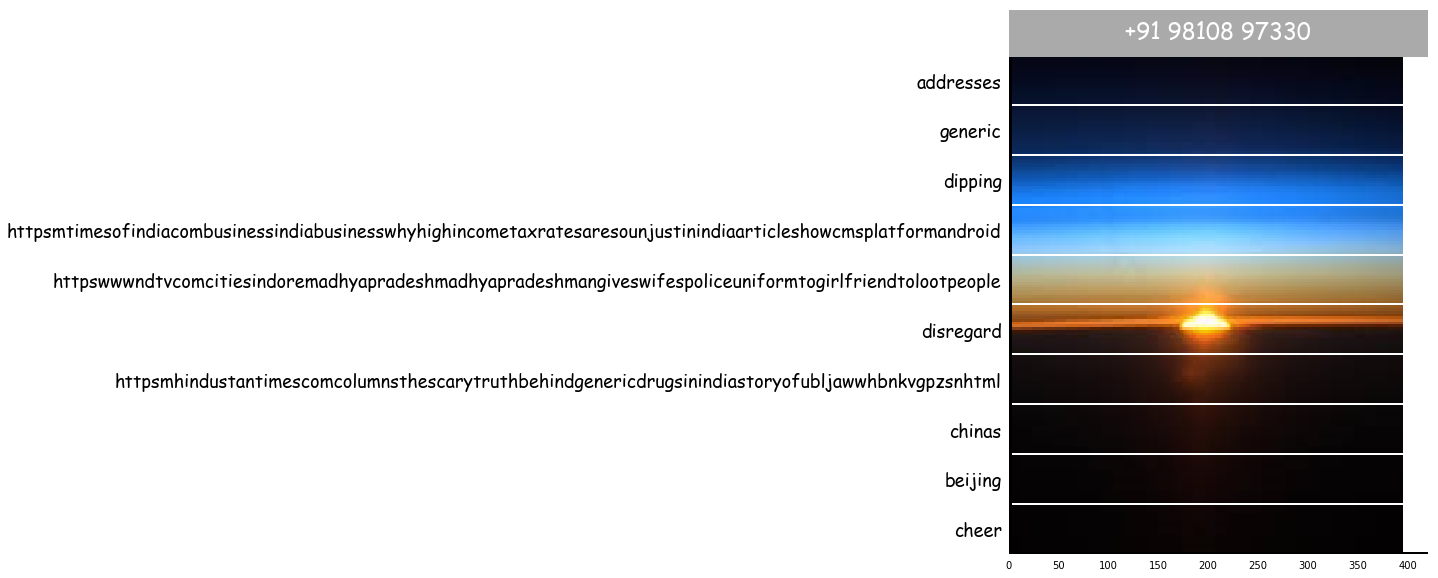

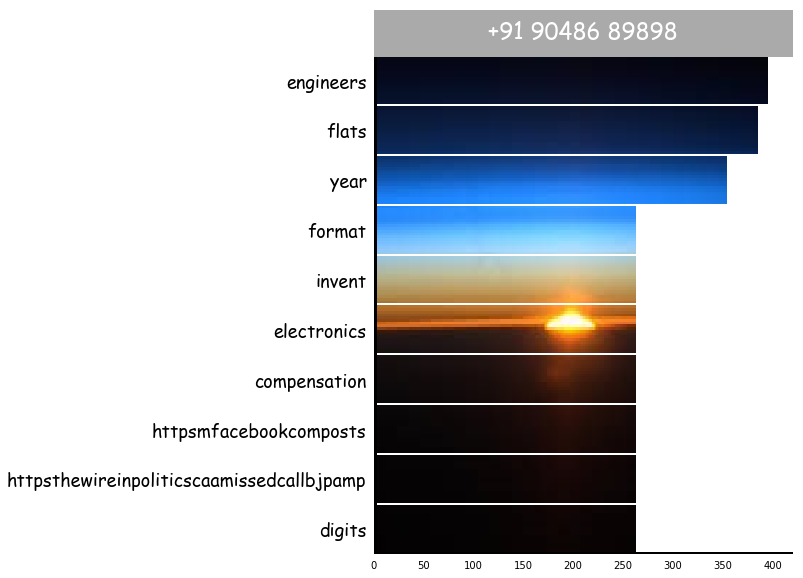

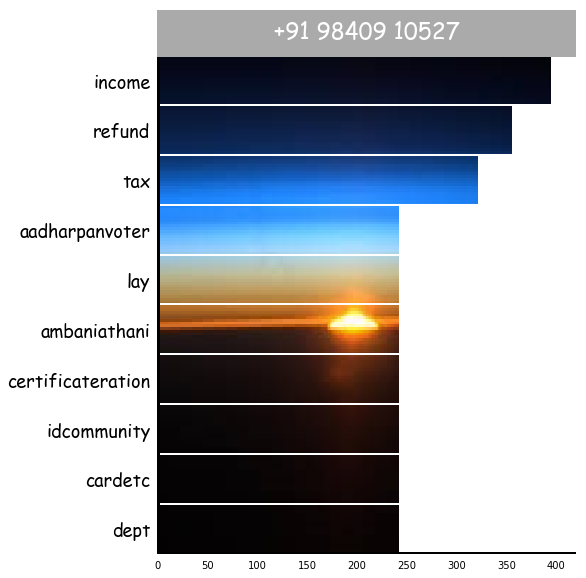

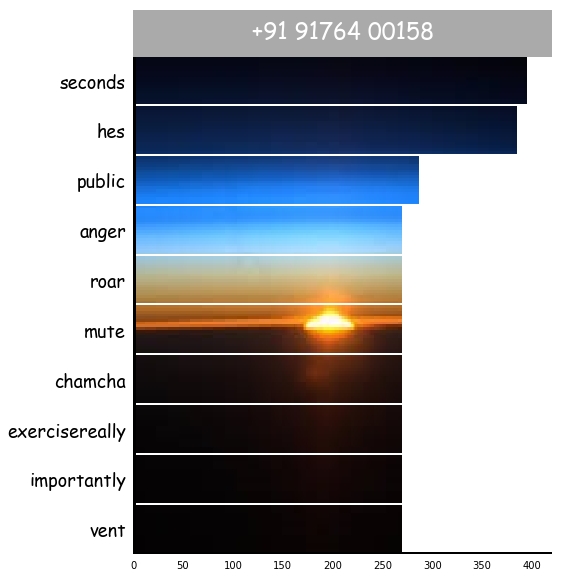

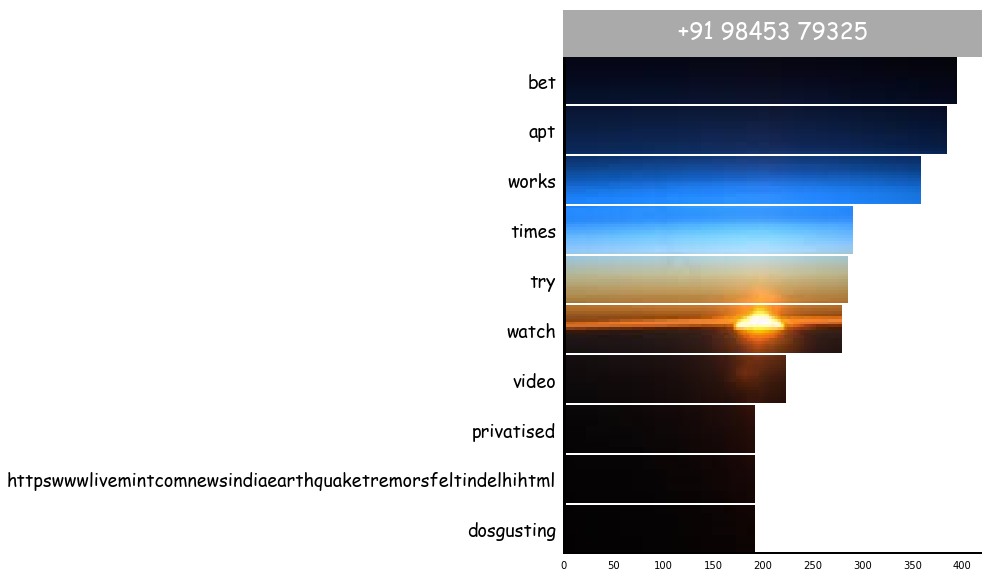

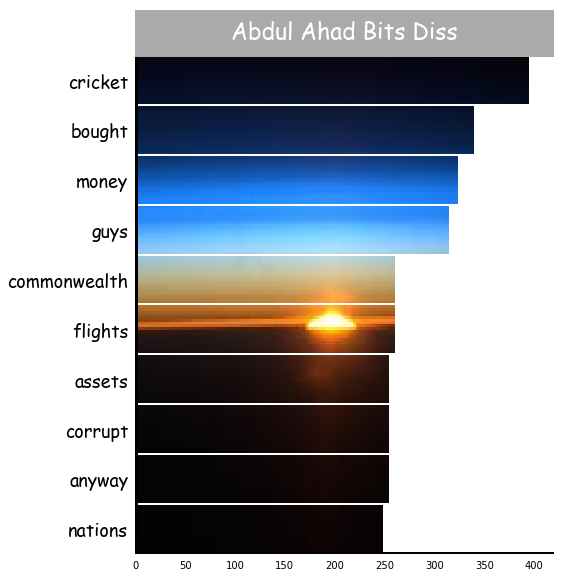

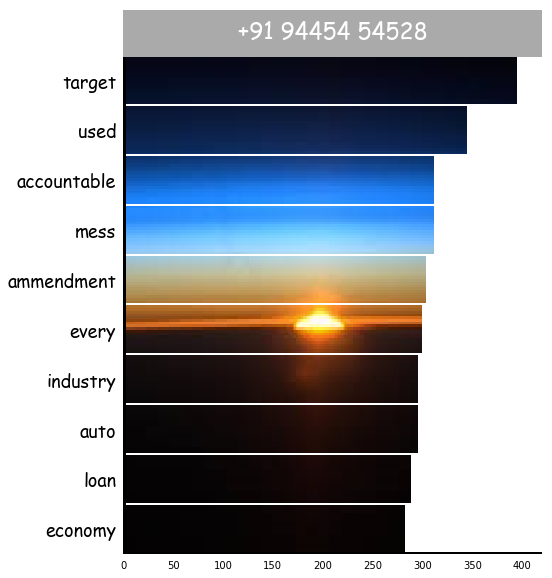

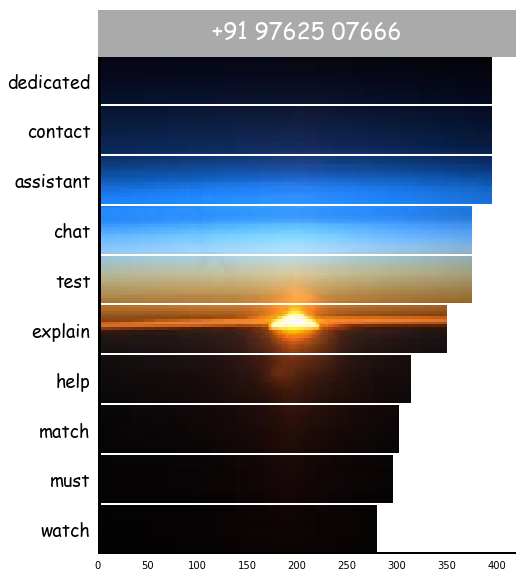

In [38]:
for username in set(df.User.values):
    tf_idf.plot_unique_words(unique_words, user = username, image_path='histogram.jpg', image_url=None, 
                             title = username, title_color="white", 
                             title_background='#AAAAAA', width=400, height=500)

## <a name="emoji">4. Emoji Analysis</a> 
[Back to Table of Contents](#table)

These analysis are based on the Emojis used in each message. Below you can find the following:
* Unique Emoji per user
* Commonly used Emoji per user
* Highly correlated Emoji per user

#### <a name="emoji-prepare">4.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data needs to be prepared as follows:
* Three new columns are created:
    * *Emoji* contains all emojis in a message
    * *Emoji_Counts* counts the number of emojis in a message
    * *Different_Emojis* extracts them in a list for handling purposes
* *counts* is a dictionary of dictionaries containing the count of each emoji per user
* *unique_emoji* is a dict of dicts containing a uniqueness score of each emoji per user compared to other users

In [39]:
# https://github.com/pandas-dev/pandas/issues/17892
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = soan_emoji.prepare_data(temp)

# Count all emojis
counts = soan_emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = soan_emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

soan_master\whatsapp\soan_emoji.py:139: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return ''.join(c for c in str if c in emoji_package.UNICODE_EMOJI)
soan_master\whatsapp\soan_emoji.py:131: RuntimeWarning: invalid value encountered in double_scalars
  unique_dict[user][word] = tf_idf_user / (tf_idf_all - tf_idf_user)


#### <a name="emoji-stats">4.2 Unique and Common Emoji</a> 
[Back to Table of Contents](#table)

Below you can find the most unique emojis according to the TF-IDF and Unique formulas that were used previously: 

** TF-IDF **

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific emoji $j$ was said by $i$  
$m = $ Number of all messages  

** Unique Emoji **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $

I purposefully based it on the number of words and messages in total and only changed *t* to the number of times emoji was said

In [40]:
soan_emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################
()
+91 96001 36104
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 99712 14555
(':/', nan)
('8/', nan)
(':p', nan)
()
Salil Bansal Diss Grp C Bits Infosys
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 91644 72637
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 98873 98089
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 80957 64285
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 94804 94131
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 99640 27359
(':/', nan)
('8/', nan)
(':p', nan)
()
Harmesh Kr Rekhanshu
(':/', nan)
('8/', nan)
(':p', nan)
()
Ashutosh Bits Leisure
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 99016 46061
(':/', nan)
('8/', nan)
(':p', nan)
()
Vivek Chaudhary Bits Diss GrpC MAD
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 81350 57013
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 78771 56879
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 89288 60704
(':/', nan)
('8/', nan)
(':p', nan)
()
+91 96741 64936
(':/', nan)
('8

#### <a name="emoji-corr">4.3 Correlation Matrix</a> 
[Back to Table of Contents](#table)

Below you find a correlation matrix of the 15 most often used emoji by a single user. The reasoning for only taking 15 emojis is that otherwise the matrix simply becomes too big. 

ValueError: zero-size array to reduction operation minimum which has no identity

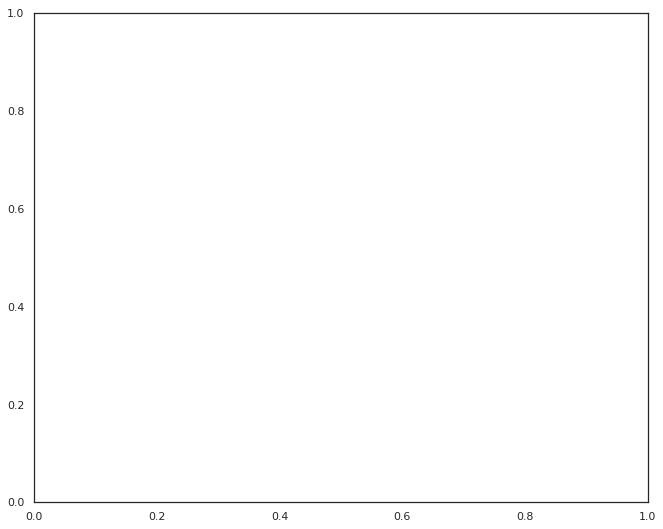

In [44]:
for username in set(df.User.values):
    soan_emoji.plot_corr_matrix(df, username, list_of_words, counts)

## <a name="topic">5. Topic Modelling</a> 
[Back to Table of Contents](#table)

#### <a name="topic-prepare">5.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data is prepared as follows:
The *pattern* is used as that is one of the few (sort of) working Dutch NLP-processors for python. There is generally little available with regards to Dutch processors. Since I want to extract topics translating text did not seem like the right way to go. So, using *pattern* I used the following functions where necessary:
* Lemmatization
* Singularize
* Predicative

Unfortunately, stemming was not an option since the Snowball stemmer from NLTK makes too many mistakes to be used. 

*NOTE*: These analyses are for the purpose of getting insights into whatsapp data. I did not spend much time optimizing algorithms for the simple reason that they already give good results out-of-the-box. Moreover, optimizing my results is likely not generalizable to your data as you are quick to overfit with such limited data.

*NOTE2*: # Make sure to download the version for python 3+:
* https://github.com/clips/pattern/tree/development
* git clone -b development https://github.com/clips/pattern
* cd pattern
* python setup.py install

In [45]:
df['Message_Prepared'] = df.apply(lambda row: topic.prepare_text_nl(row), 1)

#### <a name="topic-lda">5.2 LDA </a> 
[Back to Table of Contents](#table)

There is an abundance of methods with regards to topic modelling. Two, however, seem to be the most used: LDA and NMF. Sklearn has an implementation of both LDA and NMF which is why I used that. It should be noted that Gensim is also an extremely good package when it comes to NLP. I will be using Gensim later below for a different application. 

In [46]:
topic.topics(df, model='lda', stopwords='stopwords_dutch.txt')

#######################
### +91 96741 64936 ###
#######################


Topics in lda model:
Topic #0: hai lik say lagta me detention center
Topic #1: me ne sir will no if kar
Topic #2: hai ke ka kya liye ho itna
Topic #3: zijn to and not in haaf nrc
Topic #4: couren to will or be we who
()
#######################################
### Rahul Singh Mobile App Dev Bits ###
#######################################


Topics in lda model:
Topic #0: the zijn in of and ther dont
Topic #1: to and jata ho ther the kar
Topic #2: jata ho kar and this should to
Topic #3: zijn this deleted message it eten look
Topic #4: for lik but look in kar message
()
#######################
### +91 98108 97330 ###
#######################



ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

#### <a name="topic-nmf">5.3 NMF </a> 
[Back to Table of Contents](#table)

An application of the NMF model used for topic modelling. 

In [49]:
topic.topics(df, model='nmf', stopwords='stopwords_dutch.txt')

#######################
### +91 96741 64936 ###
#######################


Topics in nmf model:
Topic #0: zijn this new also in issue now
Topic #1: hai yeh nahi me ka bhi aayega
Topic #2: haaf you if all ar still doc
Topic #3: not they ar country delhi them wer
Topic #4: to and why in what nrc only
()
#######################################
### Rahul Singh Mobile App Dev Bits ###
#######################################


Topics in nmf model:
Topic #0: deleted message this zijn it but dont
Topic #1: the in of dont zijn ther and
Topic #2: look lik it but eten zijn should
Topic #3: jata ho and kar the in but
Topic #4: for to eten this zijn it but
()
#######################
### +91 98108 97330 ###
#######################



ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

## <a name="sentiment">6. Sentiment</a> 
[Back to Table of Contents](#table)

#### <a name="sentiment-prepare">6.1 Prepare Data</a> 
[Back to Table of Contents](#table)

Fortunately, in order to extract sentiment from a Dutch message you can extract the score (-1 being negative and 1 being positive) easily using the pattern package. Below I extract the sentiment as a new column which is needed for further analysis. 

In [50]:
from pattern.nl import sentiment  as sentiment_nl
df['Sentiment'] = df.apply(lambda row: sentiment_nl(row.Message_Clean)[0], 1)

#### <a name="sentiment-average">6.2 Average Sentiment Per User</a> 
[Back to Table of Contents](#table)

Prints the average sentiment per user to get an indication of positivity of that user. 

*NOTE*: THIS ONLY WORKS FOR DUTCH!

In [51]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
+91 96741 64936:              		0.01
Rahul Singh Mobile App Dev Bits:		0.11
+91 98108 97330:              		0.096
+91 95000 64740:              		0.01
Abdul Ahad Bits Diss:         		0.135
+91 81350 57013:              		0.035
+91 94192 45911:              		0.233
+91 91644 72637:              		0.11
+91 90947 22757:              		0.444
+91 87905 60139:              		0.12
Vivek Chaudhary Bits Diss GrpC MAD:		-0.005
+91 97767 79025:              		0.109
+91 78771 56879:              		0.065
+91 91764 00158:              		0.183
+91 98453 79325:              		0.675
+91 96001 36104:              		0.167
Salil Bansal Diss Grp C Bits Infosys:		0.131
+91 97625 07666:              		0.181
+91 94215 80968:              		0.208
+91 98905 33682:              		0.313
+91 94804 94131:              		0.071
Harmesh Kr Rekhanshu:         		0.057
+91 95003 10376:              		0.019
+91 99016 46061:              		0.0

#### <a name="sentiment-plot">6.3 Plot Sentiment</a> 
[Back to Table of Contents](#table)

Below you can see a plot of how positive the messages are over time. The y-axis works as follows, a happy smiley indicates a score of 1 (max value) meaning a positive message and a sad smiley indicates a score of -1 (min value) meaning a negative message. 

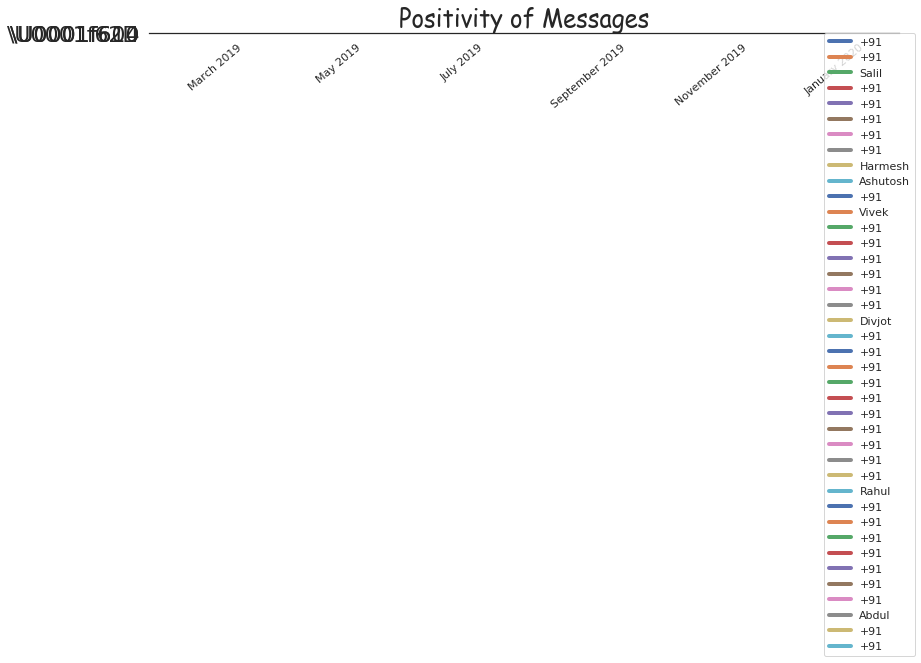

In [55]:
colors_list_2  = ['#EAAA69','#5361A5']
colors_list_8  = ['#EAAA69','#5361A5', '#000000', '#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff']

num_of_colors = len(set(df.User.values))
colors_list = []
for i in range(100000, num_of_colors):
    colors_list += ['#' + str(hex(i))[2:]]
    
sentiment.plot_sentiment(df, colors=colors_list, savefig=False)

## <a name="cloud">7. Word Clouds</a> 
[Back to Table of Contents](#table)

#### <a name="cloud-prepare">7.1 Prepare Data</a> 
[Back to Table of Contents](#table)

In [56]:
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, column="Word")

#### <a name="cloud-mask">7.2 Masked Word Cloud</a> 
[Back to Table of Contents](#table)

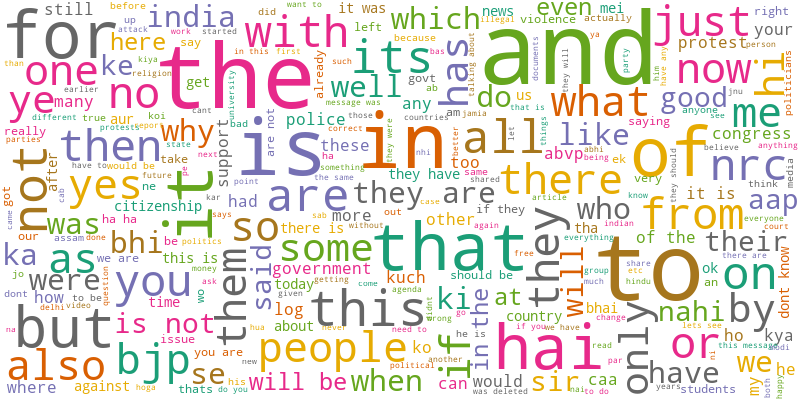

In [57]:
soan_wordcloud.create_wordcloud(df.Message_Only_Text, # mask = 'mask.jpg', 
                           stopwords='stopwords_dutch.txt', random_state=42, 
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)

#### <a name="cloud-sentiment">7.3 Sentiment-based Word Cloud</a> 
[Back to Table of Contents](#table)

*NOTE*: ONLY WORKS FOR DUTCH

In [59]:
# Choose which user you want to see the word cloud for

for username in set(df.User.values):
    positive, negative = soan_wordcloud.extract_sentiment_count(counts, user = username)

##### Positive Words

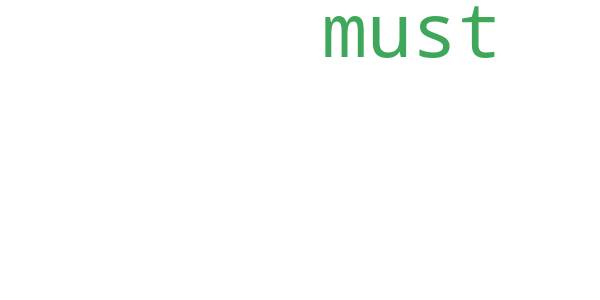

In [60]:
soan_wordcloud.create_wordcloud(data=positive, cmap='Greens', # mask='mask.jpg', 
                    stopwords='stopwords_dutch.txt', random_state=42, max_words=1000, 
                    max_font_size=50, scale=1.5, normalize_plurals=False, relative_scaling=0.5)

##### Negative Words

In [61]:
soan_wordcloud.create_wordcloud(data=negative, cmap='Reds', #mask='mask.jpg', 
                    stopwords='stopwords_dutch.txt', random_state=42, max_words=1000, 
                    max_font_size=50, scale=1.5, normalize_plurals=False, relative_scaling=0.5)

ValueError: We need at least 1 word to plot a word cloud, got 0.

## <a name="color">8. Picture Analysis</a> 
[Back to Table of Contents](#table)

NOTE: This is not part of the whatsapp data. For this chapter to work, you'll need to put at least 1 image in the folder 'Images/' or create a path of your own. It is set to not run automatically since this is merely an extra feature. Set run_colors to True if you want to run the script. 

#### <a name="color-get">8.1 Extract Frequent Colors (k-Means)</a> 
[Back to Table of Contents](#table)

In [62]:
import os
import pickle

Below is the code to retrieve and dump the top 5 most frequent colors in an image using k-Means. 
It works as follows, each pixel in an image has its own color. That color of each pixel in an image is then extracted in an rgb format. This allows each pixel to have an x (r), y (g) and z (b) coordinate. After extracting all colors of each pixel, k-Means (with k=5) is then used to cluster the points into 5 colors. For each cluster the mediod is calculated and used as a representative of that cluster. Thus, you get top 5 colors for each image. 

In [ ]:
extract_colors = False

if extract_colors:
    # Get Top 5 Frequent Colors
    path = 'Images/'
    all_colors = [colors.get_common_colors(path + i) for i in os.listdir(path)]

    # Save colors
    with open('colors.pkl', 'wb') as f:
        pickle.dump(all_colors, f)

#### <a name="color-plot">8.2 Plot Frequent Colors</a> 
[Back to Table of Contents](#table)

After getting the top 5 colors for each picture, they are counted and then displayed below in a histogram. The histogram is in a circular shape where larger/bigger/higher bars indicate colors that are more frequent in the set of pictures. There is a version of the histogram that only shows bars and one that shows a smoothened histogram to be more visually pleasing. 

In [ ]:
colors.plot_color('colors.pkl', smoothen=False, savefig=False)

In [ ]:
colors.plot_color('colors.pkl', smoothen=True, savefig=False)